In [1]:
from sktime.utils.load_data import load_from_arff_to_dataframe, load_from_tsfile_to_dataframe
from sktime.contrib.workshop_shapelets.shapelets_v3 import ContractedShapeletTransform
import time
%matplotlib inline
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sktime.contrib.workshop_shapelets.shapelets_v3'

## Univariate Example: GunPoint

In [2]:
# Load datasets
dataset = "GunPoint"

train_x, train_y = load_from_tsfile_to_dataframe("../sktime/datasets/data/"+dataset+"/"+dataset+"_TRAIN.ts")
test_x, test_y = load_from_tsfile_to_dataframe("../sktime/datasets/data/"+dataset+"/"+dataset+"_TRAIN.ts")

In [3]:
# Create Contracted Shapelet Transform with time limit of 1 monute:
st = ContractedShapeletTransform(
    random_state=0,
    verbose=0,
    time_limit_in_mins=1,
    num_candidates_to_sample_per_case=5,
    max_shapelets_to_store_per_class=1000,
    remove_self_similar=True
)

In [4]:
# Fit the transform
start_time = time.time()
shapelets = st.fit(train_x, train_y)
end_time = time.time()
print("Time taken: "+str(end_time-start_time))

Num shapelets  len of shapelets:110
Num shapelets  len of shapelets:107
Time taken: 59.88659858703613


In [5]:
# print the 5 best shapelets extracted in the minute:
for s in range(5):
    print(st.shapelets[s])

Series ID: 42, start_pos: 3, length: 46, info_gain: 0.7133121635877098, 
Series ID: 13, start_pos: 11, length: 54, info_gain: 0.7133121635877098, 
Series ID: 29, start_pos: 8, length: 45, info_gain: 0.7133121635877098, 
Series ID: 18, start_pos: 5, length: 45, info_gain: 0.6504518266138437, 
Series ID: 35, start_pos: 84, length: 12, info_gain: 0.60482098041806, 


In [6]:
# Transform the training data, then visualise the first 5 transformed cases
t_train_x = st.transform(train_x)
print("Number of shapelets: "+str(len(st.shapelets))+" (columns)")
print("Number of series:    "+str(len(train_x))+" (rows) (limited to 5 below for presentation)")
t_train_x.head()

Number of shapelets: 69 (columns)
Number of series:    50 (rows) (limited to 5 below for presentation)


0         1         2         3         4         5         6   \
0  0.034702  0.025347  0.046360  0.025347  0.008491  0.341988  0.003102   
1  0.033037  0.022411  0.043099  0.020515  0.005987  0.334514  0.003311   
2  0.023352  0.018277  0.029039  0.018347  0.000822  0.095222  0.005341   
3  0.013343  0.014633  0.021925  0.009397  0.000723  0.062196  0.002557   
4  0.044380  0.027431  0.052119  0.028572  0.008236  0.232288  0.008789   

         7         8         9     ...           59        60        61  \
0  0.045361  0.172439  0.118961    ...     0.004599  0.334409  0.146976   
1  0.041794  0.179486  0.099038    ...     0.010564  0.410799  0.168848   
2  0.025140  0.135128  0.050873    ...     0.002675  0.185000  0.135053   
3  0.010082  0.076027  0.006988    ...     0.002342  0.307294  0.107051   
4  0.019989  0.099797  0.055763    ...     0.002174  0.519384  0.179364   

         62        63        64        65        66        67        68  
0  0.006819  0.000780  0.832400  0.011327  0.043614  0.182494  0.016290  
1  0.002920  0.011398  0.826245  0.016957  0.022625  0.808123  0.048921  
2  0.015474  0.000538  0.715724  0.014257  0.053370  0.270295  0.077216  
3  0.011951  0.004020  0.785126  0.029165  0.053154  0.321600  0.070641  
4  0.003681  0.004967  0.999105  0.020215  0.049439  0.026732  0.056777  

[5 rows x 69 columns]

Series ID: 42, start_pos: 3, length: 46, info_gain: 0.7133121635877098, 


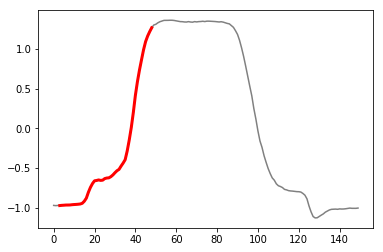

Series ID: 13, start_pos: 11, length: 54, info_gain: 0.7133121635877098, 


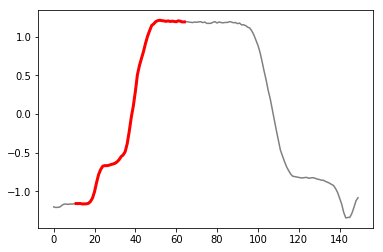

Series ID: 29, start_pos: 8, length: 45, info_gain: 0.7133121635877098, 


Series ID: 18, start_pos: 5, length: 45, info_gain: 0.6504518266138437, 


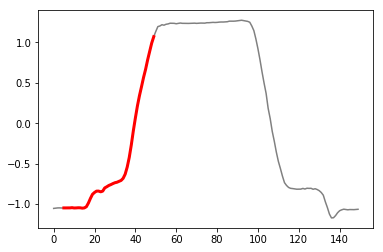

Series ID: 35, start_pos: 84, length: 12, info_gain: 0.60482098041806, 


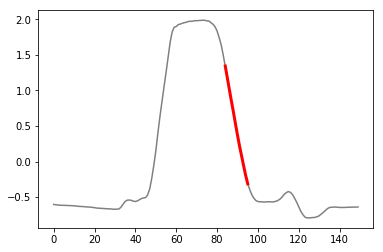

In [7]:
# Plot the top 5 shapelets on top of the series that they were extracted from 

for s in st.shapelets[0:5]:

    # summary info about the shapelet 
    print(s)
    
    # plot the series that the shapelet was extracted from 
    plt.plot(
        train_x.iloc[s.series_id,0],
        'gray'
    )
    
    # overlay the shapelet onto the full series
    plt.plot(
        list(range(s.start_pos,(s.start_pos+s.length))),
        train_x.iloc[s.series_id,0][s.start_pos:s.start_pos+s.length],
        'r',
        linewidth=3.0
    )
    plt.show()

## Multivariate Example: BasicMotions

In [8]:
# All steps as above for a multivariate datasets. The only difference is the last step, where we plot the single
# best shapelet from the 1 minute search across the 6 dimensions of the BasicMotions problem
dataset = "BasicMotions"

train_x, train_y = load_from_arff_to_dataframe("../sktime/datasets/data/"+dataset+"/"+dataset+"_TRAIN.arff")
test_x, test_y = load_from_arff_to_dataframe("../sktime/datasets/data/"+dataset+"/"+dataset+"_TRAIN.arff")

In [9]:
st = ContractedShapeletTransform(
    random_state=0,
    verbose=0,
    time_limit_in_mins=1,
    num_candidates_to_sample_per_case=5,
    max_shapelets_to_store_per_class=1000,
    remove_self_similar=True
)

In [10]:
start_time = time.time()
shapelets = st.fit(train_x, train_y)
end_time = time.time()

Num shapelets  len of shapelets:24
Num shapelets  len of shapelets:20
Num shapelets  len of shapelets:18
Num shapelets  len of shapelets:20


In [11]:
for s in range(5):
    print(st.shapelets[s])

Series ID: 34, start_pos: 7, length: 16, info_gain: 0.7793498372920851, 
Series ID: 32, start_pos: 52, length: 16, info_gain: 0.7793498372920851, 
Series ID: 38, start_pos: 26, length: 34, info_gain: 0.7793498372920851, 
Series ID: 32, start_pos: 26, length: 19, info_gain: 0.6590945568845771, 
Series ID: 31, start_pos: 16, length: 45, info_gain: 0.4074677714354199, 


In [12]:
t_train_x = st.transform(train_x)

In [13]:
print("Number of shapelets: "+str(len(st.shapelets))+" (columns)")
print("Number of series:    "+str(len(train_x))+" (rows) (limited to 5 below for presentation)")
t_train_x.head()

Number of shapelets: 26 (columns)
Number of series:    40 (rows) (limited to 5 below for presentation)


0         1          2          3          4         5          6   \
0  9.087704  7.660609   9.230918   7.593377   9.130211  6.153479   9.889419   
1  8.550524  8.154695  10.175035   8.283860   9.356986  8.514604  10.016674   
2  8.343170  9.297749  10.139708  10.026927  10.146383  9.845144   8.989892   
3  8.172683  8.773522   9.310301   9.642512   9.330817  9.749538   9.618244   
4  9.167081  8.189700  10.361890   8.752984   9.676413  8.537210   9.202712   

         7         8         9     ...            16        17        18  \
0  8.856012  6.825088  7.202083    ...     10.310560  9.271908  9.472945   
1  7.157276  5.894477  5.964055    ...      9.208129  6.910237  9.820799   
2  8.768519  6.934751  7.885396    ...      8.300436  7.527481  0.000000   
3  6.331863  6.175652  8.320029    ...      0.000000  8.173509  7.856074   
4  7.323326  5.861221  6.254801    ...      8.170544  0.000000  7.184250   

          19        20        21        22         23        24        25  
0  10.050546  7.622776  9.467907  7.717082   8.215105  6.583708  5.741365  
1   9.165337  7.878687  9.264058  6.945310  10.008311  6.287409  6.168902  
2   8.860740  6.929965  7.670379  4.655525   6.881113  6.926257  6.507016  
3   7.156329  7.712330  7.565734  5.363232   8.510947  7.818702  6.590682  
4   8.853732  7.530817  8.652328  5.787766   9.312691  5.833785  5.906857  

[5 rows x 26 columns]

### Single shapelet visualised over the 6 dimensions of BasicMotions

Series ID: 34, start_pos: 7, length: 16, info_gain: 0.7793498372920851, 
Dimension 1


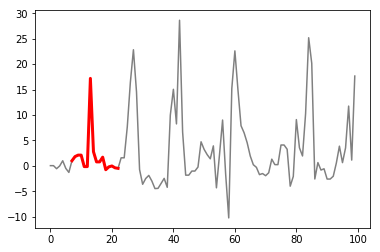

Dimension 2


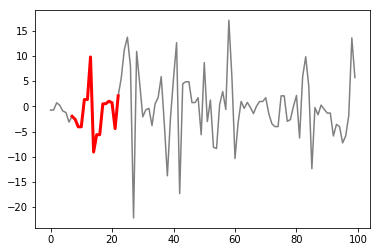

Dimension 3


Dimension 4


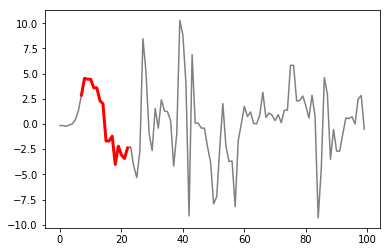

Dimension 5


Dimension 6


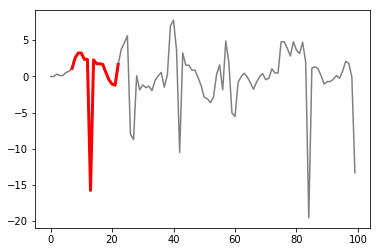

In [14]:
s = st.shapelets[0]
print(s)
# for each extracted shapelet (in descending order of quality/information gain)
for dim in range(len(train_x.iloc[0])):
    print("Dimension "+str(dim+1))   
    # plot the series that the shapelet was extracted from 
    plt.plot(
        train_x.iloc[s.series_id,dim],
        'gray'
    )
    
    # overlay the shapelet onto the full series
    plt.plot(
        list(range(s.start_pos,(s.start_pos+s.length))),
        train_x.iloc[s.series_id,dim][s.start_pos:s.start_pos+s.length],
        'r',
        linewidth=3.0
    )
    plt.show()